# 실습 7차시

### 실습 제출 방법:

1.   '파일 > 드라이브에 사본 저장'으로 노트북 복사본을 만듭니다.
2.   제목 끝에 학번과 이름을 추가합니다. 예시) 실습 1차시_20XXXXXXXX_이름
3.   코랩 노트북의 모든 코드가 오류없이 돌아가도록 실습 활동을 완료합니다.
4.   블랙보드의 해당 실습 과제란에 '파일 > .ipynb로 다운로드'하여 노트북 파일을 제출하시면 됩니다.

실습 내용

*   Random Forest
*   Bagging & Boosting
*   K-Means
*   Feature Selection



In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# 1. Ensemble of Decision Trees

앙상블(ensemble)은 여러 머신러닝 모델을 연결하여 더 강력한 모델을 만드는 기법입니다. 머신러닝에는 이런 종류의 모델이 많지만, 그중 두 앙상블 모델이 분류와 회귀 문제의 다양한 데이터셋에서 효과적이라고 입증되었습니다. 랜덤 포레스트(random forest)는 모델을 구성하는 기본 요소로 결정 트리를 사용합니다.

## 1.1 Random Forest
앞서 확인한 것처럼 결정 트리의 주요 단점은 훈련 데이터에 과대적합되는 경향이 있다는 것입니다. 랜덤 포레스트는 이 문제를 회피할 수 있는 방법입니다. 랜덤 포레스트는 기본적으로 조금씩 다른 여러 결정 트리의 묶음입니다. 랜덤 포레스트의 아이디어는 각 트리는 비교적 예측을 잘 할 수 있지만 데이터의 일부에 과대적합하는 경향을 가진다는 데 기초합니다. 예컨대 잘 작동하되 서로 다른 방향으로 과대적합된 트리를 많이 만들면 그 결과를 평균냄으로써 과대적합된 양을 줄일 수 있습니다. 이렇게 하면 트리 모델의 예측 성능이 유지되면서 과대적합이 줄어드는 것이 수학적으로 증명되었습니다.

이런 전략을 구현하려면 결정 트리를 많이 만들어야 합니다. 각각의 트리는 타깃 예측을 잘 해야 하고 다른 트리와는 구별되어야 합니다. 랜덤 포레스트는 이름에서 알 수 있듯이 트리들이 달라지도록 트리 생성 시 무작위성을 주입합니다. 랜덤 포레스트에서 트리를 랜덤하게 만드는 방법은 두 가지 입니다. 트리를 만들 때 사용되는 데이터 포인트를 무작위로 선택하는 방법과 분할 테스트에서 특성을 무작위로 선택하는 방법입니다. 이 방식들을 자세히 살펴보겠습니다.


## 1.2 Scikit-learn: Random Forest

랜덤 포레스트 모델을 만들려면 생성할 트리의 개수를 정해야 합니다(`RandomForestRegressor`나 `RandomForestClassifier`의 `n_estimators` 매개변수). 여기에서는 트리가 10개 필요하다고 가정하겠습니다. 이 트리들은 완전히 독립적으로 만들어져야 하므로 알고리즘은 각 트리가 고유하게 만들어지도록 무작위한 선택을 합니다. 트리를 만들기 위해 먼저 데이터의 부트스트랩 샘플(Bootstrap sample)을 생성합니다. 다시 말해 n_samples개의 데이터 포인트 중에서 무작위로 데이터셋을 n_samples 횟수만큼 반복 추출합니다(한 샘플이 여러 번 중복 추출될 수 있습니다). 이 데이터셋은 원래 데이터셋 크기와 같지만, 어떤 데이터 포인트는 누락될 수도 있고 (대략 1/3 정도) 어떤 데이터 포인트는 중복되어 들어 있을 수 있습니다.

예를 들면 리스트 `[‘a’,’b’,’c’,’d’]`에서 부트스트랩 샘플을 만든다고 해보겠습니다. 가능한 부트스트랩 샘플은 `[‘b’,’d’,’d’,’c’]`도 될 수 있고 `[‘d’,’a’,’d’,’a’]`와 같은 샘플도 만들어질 수 있습니다.
그다음 이렇게 만든 데이터셋으로 결정 트리를 만듭니다. 그런데 우리가 본 결정 트리 알고리즘과 조금 다릅니다. 각 노드에서 전체 특성을 대상으로 최선의 테스트를 찾는 것이 아니고 알고리즘이 각 노드에서 후보 특성을 무작위로 선택한 후 최선의 테스트를 찾습니다. 몇 개의 특성을 고를지는 `max_features` 매개변수로 조정할 수 있습니다. 후보 특성을 고르는 것은 매 노드마다 반복되므로 트리의 각 노드는 다른 후보 특성들을 사용하여 테스트를 만듭니다.

부트스트랩 샘플링은 랜덤 포레스트의 트리가 조금씩 다른 데이터셋을 이용해 만들어지도록 합니다. 또 각 노드에서 특성의 일부만 사용하기 때문에 트리의 각 분기는 각기 다른 특성 부분집합을 사용합니다. 이 두 매커니즘이 합쳐져서 랜덤 포레스트의 모든 트리가 서로 달라지도록 만듭니다.

이 방식에서 핵심 매개변수는 `max_features`입니다. `max_features`를 `n_features`로 설정하면 트리의 각 분기에서 모든 특성을 고려하므로 특성 선택에 무작위성이 들어가지 않습니다(하지만 부트스트랩 샘플링으로 인한 무작위성은 그대로입니다). `max_features=1`로 설정하면 트리의 분기는 테스트할 특성을 고를 필요가 없게 되며 그냥 무작위로 선택한 특성의 임계값을 찾기만 하면 됩니다. 결국 `max_features`값을 크게 하면 랜덤 포레스트의 트리들은 매우 비슷해지고 가장 두드러진 특성을 이용해 데이터에 잘 맞춰질 것입니다. `max_features`를 낮추면 랜덤 포레스트 트리들은 많이 달라지고 각 트리는 데이터에 맞추기 위해 깊이가 깊어지게 됩니다.

랜덤 포레스트로 예측을 할 때는 먼저 알고리즘이 모델에 있는 모든 트리의 에측을 만듭니다. 회귀의 경우에는 이 예측들을 평균하여 최종 예측을 만듭니다. 분류의 경우는 약한 투표 전략을 사용합니다. 즉 각 알고리즘이 가능성 있는 출력 레이블의 확률을 제공함으로써 간접적인 예측을 합니다. 트리들이 예측한 확률을 평균내어 가장 높은 확률을 가진 클래스가 예측값이 됩니다.

In [2]:
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

# two_moon 데이터셋을 가지고 실습합니다.
X, y = make_moons(n_samples=200, noise=0.25, random_state=42)
Xm_train, Xm_test, ym_train, ym_test = train_test_split(X, y, stratify=y, random_state=42)

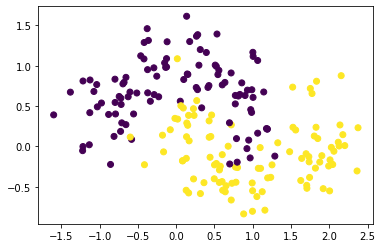

In [3]:
# two_moon 데이터를 시각화해봅니다.
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()

In [4]:
from sklearn.ensemble import RandomForestClassifier

# 트리 5개로 구성된 랜덤 포레스트 모델을 만들어보겠습니다.
forest_m = RandomForestClassifier(n_estimators=5, random_state=2)
forest_m.fit(Xm_train, ym_train)

RandomForestClassifier(n_estimators=5, random_state=2)

랜덤 포레스트 안에 만들어진 트리는 `estimators_` 속성에 저장됩니다. 각 트리에서 학습된 결정 경계와 이를 취합해 만든 결정 경계를 함께 시각화해보겠습니다

In [5]:
from matplotlib.colors import ListedColormap

def plot_decision_boundary(forest):
  figure = plt.figure(figsize=(36, 5))
  x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
  y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
  xx, yy = np.meshgrid(np.arange(x_min, x_max, .02), np.arange(y_min, y_max, .02))
  cm = plt.cm.RdBu
  cm_bright = ListedColormap(['#FF0000', '#0000FF'])

  for i in range(len(forest.estimators_)):
    ax = plt.subplot(1, 6, i+1)
    Z = forest.estimators_[i].predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)
    ax.scatter(Xm_train[:, 0], Xm_train[:, 1], c=ym_train, cmap=cm_bright, edgecolors='k')
    ax.set_xticks(())
    ax.set_yticks(())

  ax = plt.subplot(1, 6, 6)
  Z = forest.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
  Z = Z.reshape(xx.shape)
  ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)
  ax.scatter(Xm_train[:, 0], Xm_train[:, 1], c=ym_train, cmap=cm_bright, edgecolors='k')
  ax.set_xticks(())
  ax.set_yticks(())

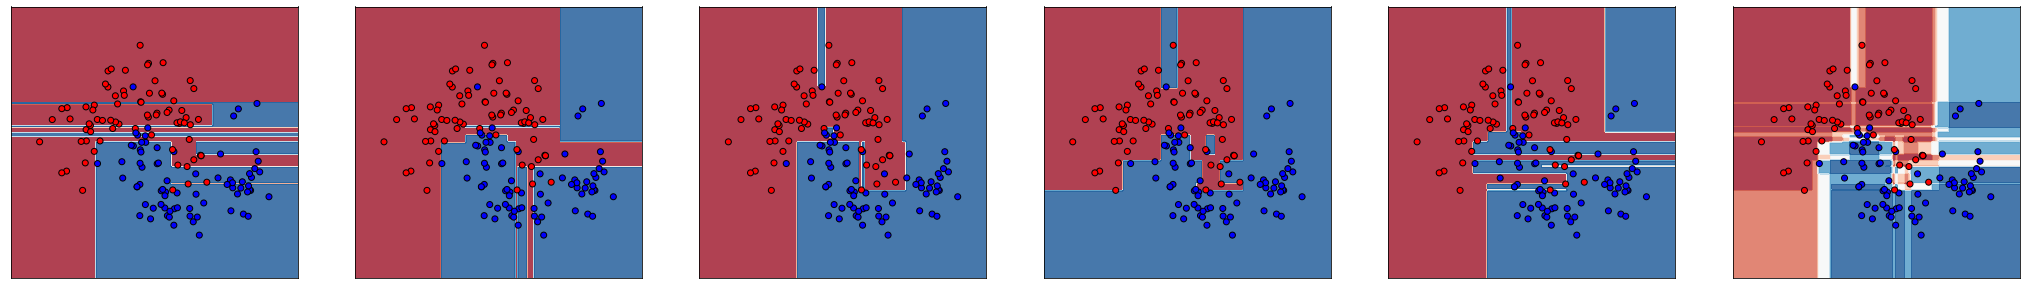

In [6]:
# 주어진 함수를 사용하여 다섯개의 트리와 랜덤 포레스트의 결정 경계를 시각화해봅니다. 
plot_decision_boundary(forest_m) 

다섯 개의 트리가 만든 결정 경계는 확연하게 다르다는 것을 알 수 있습니다. 부트스트랩 샘플링 때문에 한쪽 트링에 나타나는 훈련 포인트가 다른 트리에는 포함되지 않을 수 있어 각 트리는 불완전합니다.

랜덤 포레스트는 개개의 트리보다는 덜 과대적합되고 훨씬 좋은 결정 경계를 만들어줍니다. 실제 애플리케이션에서는 매우 많은 트리를 사용하기 때문에(수백, 수천 개) 더 부드러운 결정 경계가 만들어집니다.

다른 예로 유방암 데이터셋에 100개의 트리로 이뤄진 랜덤 포레스트를 적용해보겠습니다.

In [7]:
from sklearn.datasets import load_breast_cancer

# 유방암 데이터를 로드하고 train/test셋으로 나눕니다.
cancer = load_breast_cancer()
Xc_train, Xc_test, yc_train, yc_test = train_test_split(cancer.data, cancer.target, random_state=42)

In [8]:
# 데이터에 어떤 특성이 있는지 살펴봅니다.
cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [9]:
# 랜덤 포레스트 분류기를 유방암 데이터에 훈련시킵니다. n_estimators=100, random_state=42
forest_c = RandomForestClassifier(n_estimators=100, random_state=42)
forest_c.fit(Xc_train, yc_train)

RandomForestClassifier(random_state=42)

In [10]:
print("Random Forest Training Set Accuracy: {:.3f}".format(forest_c.score(Xc_train, yc_train)))
print("Random Forest Test Set Accuracy: {:.3f}".format(forest_c.score(Xc_test, yc_test)))

Random Forest Training Set Accuracy: 1.000
Random Forest Test Set Accuracy: 0.965


랜덤 포레스트는 아무런 매개변수 튜닝 없이도 선형 모델이나 단일 결정 트리보다 높은 97% 정확도를 내고 있습니다. 단일 결정 트리에서 한 것처럼 max_features 매개변수를 조정하거나 사전 가지치기를 할 수도 있습니다. 하지만 랜덤 포레스트는 기본 설정으로도 좋은 결과를 만들어줄 때가 많습니다.

결정 트리처럼 랜덤 포레스트도 특성 중요도를 제공하는데 각 트리의 특성 중요도를 취합하여 계산한 것입니다. 일반적으로 랜덤 포레스트에서 제공하는 특성 중요도가 하나의 트리에서 제공하는 것보다 더 신뢰할 만합니다.

In [11]:
def plot_imp(clf):
  sorted_idx = clf.feature_importances_.argsort()
  y_ticks = np.arange(0, len(cancer.feature_names))
  fig, ax = plt.subplots()
  ax.barh(y_ticks, clf.feature_importances_[sorted_idx])
  ax.set_yticklabels(cancer.feature_names[sorted_idx])
  ax.set_yticks(y_ticks)
  fig.tight_layout()
  plt.show()

In [12]:
from sklearn.tree import DecisionTreeClassifier

# 랜덤 포레스트와 비교하기 위해 결정트리 분류기를 생성하고 유방암 데이터에 훈련시킵니다.
dec_tree = DecisionTreeClassifier(random_state=42)
dec_tree.fit(Xc_train, yc_train)

DecisionTreeClassifier(random_state=42)

In [13]:
print("Decision Tree Training Set Accuracy: {:.3f}".format(dec_tree.score(Xc_train, yc_train)))
print("Decision Tree Test Set Accuracy: {:.3f}".format(dec_tree.score(Xc_test, yc_test)))

Decision Tree Training Set Accuracy: 1.000
Decision Tree Test Set Accuracy: 0.951


In [14]:
# 하나의 트리에서 제공하는 feature importance를 살펴보겠습니다.
dec_tree.feature_importances_

array([0.        , 0.02601101, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.69593688, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.01277192, 0.00155458,
       0.        , 0.00670697, 0.01702539, 0.        , 0.        ,
       0.0877369 , 0.10787925, 0.        , 0.03452044, 0.00985664,
       0.        , 0.        , 0.        , 0.        , 0.        ])

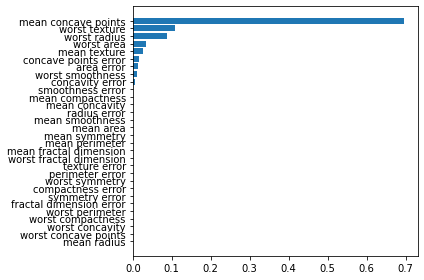

In [15]:
# 결정 트리의 특성 중요도를 시각화해봅니다.
plot_imp(dec_tree)

In [16]:
# 랜덤포레스트의 feature importance를 살펴봅니다.
forest_c.feature_importances_

array([0.03971058, 0.01460399, 0.05314639, 0.04277978, 0.00816485,
       0.01140166, 0.08321459, 0.0902992 , 0.00443533, 0.00443395,
       0.01951684, 0.00459978, 0.00868228, 0.04355077, 0.00464415,
       0.0036549 , 0.00701442, 0.00504716, 0.00371411, 0.00658253,
       0.08127686, 0.01649014, 0.07138828, 0.12319232, 0.01033481,
       0.01580059, 0.03174022, 0.17229521, 0.01310266, 0.00518165])

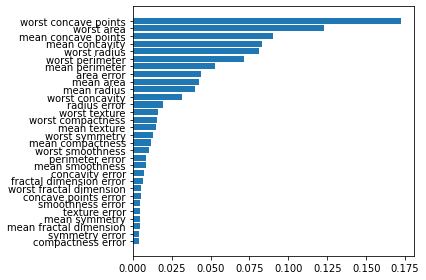

In [17]:
#  랜덤 포레스트의 feature importance를 시각화해봅니다.
plot_imp(forest_c)

그림에서 알 수 있듯이 랜덤 포레스트에서는 단일 트리의 경우보다 훨신 많은 특성이 0 이상의 중요도 값을 갖습니다. 랜덤 포레스트를 만드는 무작위성은 알고리즘이 가능성 있는 많은 경우를 고려할 수 있도록 하므로, 그 결과 랜덤 포레스트가 단일 트리보다 더 넓은 시각으로 데이터를 바라볼 수 있습니다.

## 1.3 장단점과 매개변수

회귀와 분류에 있어서 랜덤 포레스트는 현재 가장 널리 사용되는 머신러닝 알고리즘입니다. 랜덤 포레스트는 성능이 매우 뛰어나고 매개변수 튜닝을 많이 하지 않아도 잘 작동하며 데이터의 스케일을 맞출 필요도 없습니다.

기본적으로 랜덤 포레스트는 단일 트리의 단점을 보완하고 장점은 그대로 가지고 있습니다. 만약 의사 결정 과정을 간소하게 표현해야 한다면 단일 트리를 사용할 수 있습니다. 왜냐하면 수샙, 수백개의 트리를 자세히 분석하기 어렵고 랜덤 포레스트의 트리는 (특성의 일부만 사용하므로) 결정 트리보다 더 깊어지는 경향도 있기 때문입니다. 그러므로 비전문가에게 예측 과정을 시각적으로 보여주기 위해서는 하나의 결정 트리가 더 좋은 선택입니다. 대량의 데이터셋에서 랜덤 포레스트 모델을 만들 때 다소 시간이 걸릴 수 있지만 CPU 코어가 많다면 손쉽게 병렬 처리할 수 있습니다. 멀티 코어 프로세서일 때는 (요즘의 모든 컴퓨터는 코어가 둘 이상입니다) `n_jobs` 매개변수를 이용하여 사용할 코어 수를 지정할 수 있습니다. 사용하는  CPU 코어 개수에 비례해서 속도도 빨라집니다(코어를 두 개 사용하면 랜덤 포레스트의 훈련 속도도 두 배 빨라집니다). 하지만 n_jobs 매개변수를 코어 개수보다 크게 지정하는 것은 별로 도움이 되지 않습니다. `n_jobs=-1`로 지정하면 컴퓨터의 모든 코어를 사용합니다.

유념할 점은 랜덤 포레스트는 이름 그대로 랜덤합니다. 그래서 다른 `random_state`를 지정하면 (또는 `random_state`를 지정하지 않으면) 전혀 다른 모델이 만들어집니다. 랜덤 포레스트의 트리가 많으면 많을수록 `random_state` 값의 변화에 따른 변동이 적습니다. 만약 같은 결과를 만들어야 한다면 `random_state` 값을 고정해야 합니다.

랜덤 포레스트는 텍스트 데이터 같이 매우 차원이 높고 희소한 데이터에는 잘 작동하지 않습니다. 이런 데이터에는 선형 모델이 더 적합합니다. 랜덤 포레스트는 매우 큰 데이터셋에도 잘 작동하며 훈련은 여러 CPU  코어로 간단하게 병렬화할 수 있습니다. 하지만 랜덤 포레스트는 선형 모델보다 많은 메모리를 사용하며 훈련과 예측이 느립니다. 속도와 메모리 사용에 제약이 있는 애플리케이션이라면 선형 모델이 적합할 수 있습니다.

중요 매개변수는 `n_estimators`, `max_features`이고 `max_depth` 같은 사전 가지치기 옵션이 있습니다. `n_estimators`는 클수록 좋습니다. 더 많은 트리를 평균하면 과대적합을 줄여 더 안정적인 모델을 만듭니다. 하지만 이로 인해 잃는 것도 있는데, 더 많은 트리는 더 많은 메모리와 긴 훈련 시간으로 이어집니다. 경험적으로 봤을 때 “가용한 시간과 메모리만큼 많이” 만드는 것이 좋습니다.
앞서 이야기한 것처럼 `max_features`는 각 트리가 얼마나 무작위가 될지를 결정하며 작은 `max_features`는 과대적합을 줄여줍니다. 일반적으로 기본값을 쓰는 것이 좋은 방법입니다. 분류는 `max_features=sqrt(n_features)`이고 회귀는 `max_features=n_features`입니다. `max_features`나 `max_leaf_nodes` 매개변수를 추가하면 가끔 성능이 향상되기도 합니다. 또 훈련과 예측에 필요한 메모리와 시간을 많이 줄일 수도 있습니다.

## 1.4 Bagging

배깅(bagging)은 Bootstrap aggregating의 줄임말입니다. 배깅은 중복을 허용한 랜덤 샘플링으로 만든 훈련 세트를 사용하여 분류기를 각기 다르게 학습시킵니다. 부트스트랩 샘플을 만드는 것은 앞서 살펴본 랜덤 포레스트의 특징과 같습니다. 분류기가 `predict_proba()` 메서드를 지원하는 경우 확률값을 평균하여 예측을 수행합니다. 그렇지 않은 분류기를 사용할 때는 가장 빈도가 높은 클래스 레이블이 예측 결과가 됩니다.

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import BaggingClassifier

# Bagging을 사용하여 cancer 데이터셋에 LogisticRegression 모델을 100개 훈련하여 앙상블해봅니다.
bagging = BaggingClassifier(LogisticRegression(), n_estimators=100, oob_score=True, n_jobs=-1, random_state=42)
bagging.fit(Xm_train, ym_train)

BaggingClassifier(base_estimator=LogisticRegression(), n_estimators=100,
                  n_jobs=-1, oob_score=True, random_state=42)

위 코드에서 `LogisticRegression` 객체를 기반 분류기로 전달하고 훈련할 분류기의 개수는 100개로 지정했습니다(`n_estimators=100`). `oob_score`를 `True`로 지정하면 매개변수는 부트스트래핑에 포함되지 않은 샘플을 기반으로 훈련된 모델을 평가합니다(이 값을 OOB(Out Of Bag) 오차라고도 부릅니다). `oob_score` 값을 통해 테스트 세트의 성능을 짐작할 수 있습니다. `RandomForestClassifier`도 `oob_score` 매개변수를 지원합니다. 두 모델 모두 이 매개변수의 기본값은 `False`입니다.

In [19]:
print("Train set accuracy: {:.3f}".format(bagging.score(Xm_train, ym_train)))
print("Test set accuracy: {:.3f}".format(bagging.score(Xm_test, ym_test)))

#  OOB 오차를 출력합니다.
print("OOB sample score: {:.3f}".format(bagging.oob_score_))

Train set accuracy: 0.813
Test set accuracy: 0.880
OOB sample score: 0.807


In [20]:
from sklearn.tree import DecisionTreeClassifier

#결정 트리로 배깅을 수행하는 것보다 랜덤 포레스트를 사용하는 것이 편리하지만 여기서는 직접 결정 트리에 배깅을 적용해보겠습니다.
bagging = BaggingClassifier(DecisionTreeClassifier(), n_estimators=5, n_jobs=-1, random_state=42)
bagging.fit(Xm_train, ym_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=5,
                  n_jobs=-1, random_state=42)

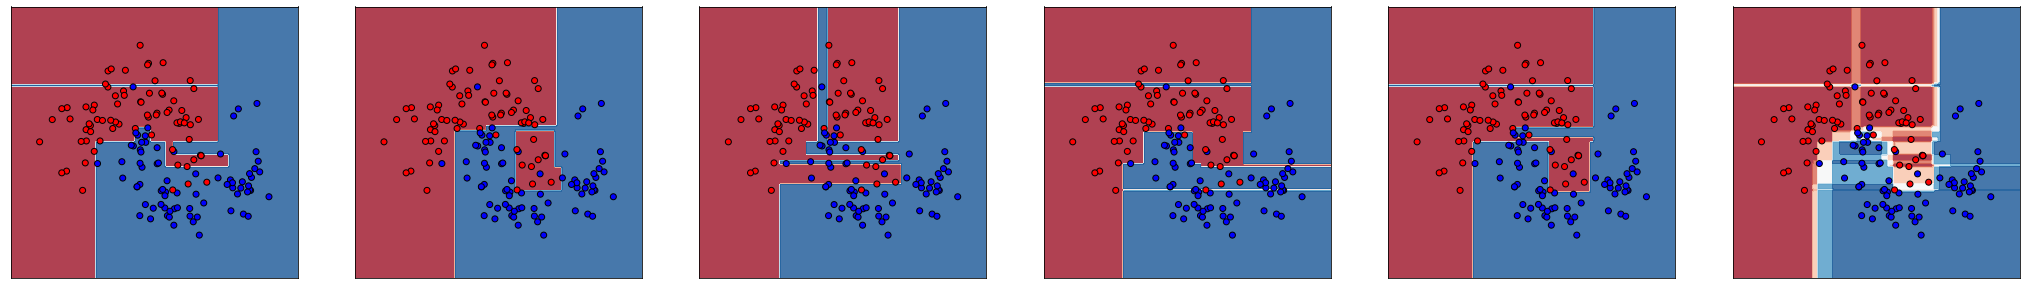

In [21]:
# 랜덤 포레스트에서처럼 이 배깅 분류기에 있는 결정 트리의 결정 경계를 시각화해보겠습니다.
plot_decision_boundary(bagging)

결과 그래프는 랜덤 포레스트의 결정 경계와 매우 비슷합니다.

In [22]:
# `n_estimators=100`으로 늘려서 cancer 데이터셋에 훈련시켜보고 훈련 세트의 테스트 세트 성능을 확인해보겠습니다.
bagging = BaggingClassifier(DecisionTreeClassifier(), n_estimators=100, oob_score=True, n_jobs=-1, random_state=42)
bagging.fit(Xm_train, ym_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=100,
                  n_jobs=-1, oob_score=True, random_state=42)

In [23]:
print("Train set accuracy: {:.3f}".format(bagging.score(Xm_train, ym_train)))
print("Test set accuracy: {:.3f}".format(bagging.score(Xm_test, ym_test)))
print("OOB sample score: {:.3f}".format(bagging.oob_score_))

Train set accuracy: 1.000
Test set accuracy: 0.900
OOB sample score: 0.900


배깅은 랜덤 포레스트와 달리 `max_samples` 매개변수에서 부트스트랩 샘플의 크기를 지정할 수 있습니다. 또한 랜덤 포레스트는 `DecisionTreeClassifier(splitter=“best”)`를 사용하도록 고정되어 있습니다. 결정 트리를 `splitter=‘random’`으로 설정하면 무작위로 분할한 후보 노드 중에서 최선의 분할을 찾습니다.

## 1.5 AdaBoost

에이다부스트는 Adaptive Boosting의 줄임말입니다. 에이다부스트는 약한 학습기를 사용하며 이전의 모델이 잘못 분류한 샘플에 가중치를 높여서 다음 모델을 훈련시킵니다. 훈련된 각 모델은 성능에 다라 가중치가 부여됩니다. 예측을 만들 때는 모델이 예측한 레이블을 기준으로 모델의 가중치를 합산하여 가장 높은 값을 가진 레이블을 선택합니다.

scikit-learn의 `AdaBoostClassifier`는 기본적으로 `DecisionTreeClassifier(max_depth=1)`를 사용하고 `AdaBoostRegressor`는 `decisionTreeRegressor(max_depth=3)`를 사용하지만 `base_estimator` 매개변수에서 다른 모델을 지정할 수도 있습니다. 순차적으로 학습해야 하기 때문에 `n_jobs` 매개변수를 지원하지 않습니다.

In [24]:
from sklearn.ensemble import AdaBoostClassifier

# AdaBoost를 two_moons 데이터에 적용해봅니다.
ada = AdaBoostClassifier(n_estimators=5, random_state=42)
ada.fit(Xm_train, ym_train)

AdaBoostClassifier(n_estimators=5, random_state=42)

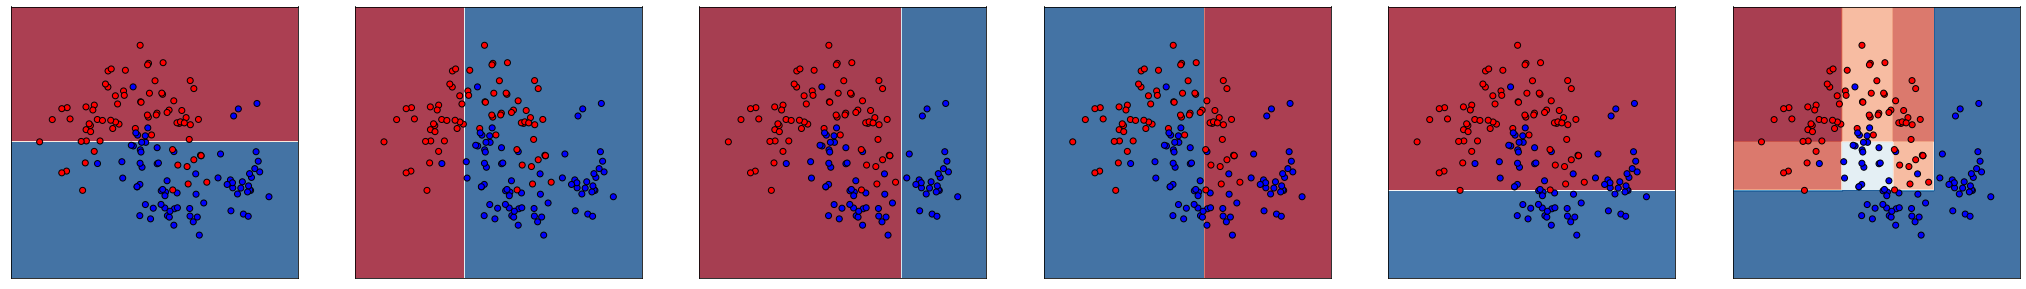

In [25]:
# AdaBoost의 각 estimator의 결정 경계를 시각화해봅니다.
plot_decision_boundary(ada)

`AdaBoostClassifier`는 깊이가 1인 결정 트리를 사용하기 때문에 각 트리의 결정 경계가 직선 하나입니다. 앙상블된 결정 경계도 다른 앙상블 모델에 비해 좀 더 단순합니다.

In [26]:
# 이번에는 AdaBoost를 cancer 데이터에 적용해봅니다.
ada = AdaBoostClassifier(n_estimators=100, random_state=42)
ada.fit(Xc_train, yc_train)

AdaBoostClassifier(n_estimators=100, random_state=42)

In [27]:
print("Train set accuracy: {:.3f}".format(ada.score(Xc_train, yc_train)))
print("Test set accuracy: {:.3f}".format(ada.score(Xc_test, yc_test)))

Train set accuracy: 1.000
Test set accuracy: 0.944


아주 얕은 트리를 앙상블했기 때문에 일반화 성능이 조금 더 향상되었습니다.

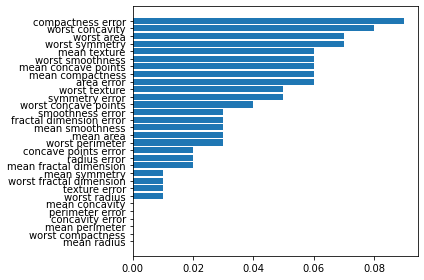

In [28]:
# AdaBoost의 특성 중요도를 시각화해봅니다.
plot_imp(ada)

에이다부스트의 특성 중요도를 확인해보면 다른 모델에서 부각되지 않았던 `compactness error` 특성을 크게 강조하고 있습니다.

# 2. Introduction to Clustering

실제 환경에서 접하는 데이터에는 레이블이 부착되어 있지 않고 질문에 대한 레이블이 지정된 답변이 제공되지 않는 경우가 많습니다. 이러한 레이블링되지 않은 데이터에서 패턴을 찾는 것은 많은 머신러닝 애플리케이션에서 공통적인 주제입니다. Unsupervised Learning은 이러한 데이터에서 패턴과 구조를 찾는 방법입니다.

클러스터링은 가장 잘 알려진 unsupervised learning 기술입니다. 유사한 그룹 또는 클러스터를 식별하여 레이블이 지정되지 않은 데이터에서 구조를 찾습니다. 
클러스터링 애플리케이션의 예는 다음과 같습니다:

*   Recommendation engines: 제품을 그룹화하여 사용자 환경을 개인화합니다.
*   Search engines: 뉴스 주제와 검색 결과를 그룹화합니다.
*   Market segmentation: 지리, 인구 통계 및 행동에 따라 고객을 그룹화합니다.
*   Image segmentation: 의료 영상 촬영 또는 도로 장면 분할을 실시합니다.

클러스터링의 목적은 데이터를 분리하여 서로 유사한 데이터가 같은 그룹에 있는 반면 서로 다른 데이터는 서로 다른 그룹에 있도록 하는 것입니다. 이를 수행하기 위해서 두가지 설정을 정해야 합니다.

*   몇 개의 그룹을 선택해야 할까요?
*   유사성(similarity)을 어떻게 정의할 수 있을까요?

K-Means는 가장 인기 있고 잘 알려진 클러스터링 알고리즘입니다. "K"는 데이터에서 찾을 클러스터(그룹) 수를 나타냅니다. 평균은 각 군집 중심까지의 평균 데이터 거리를 가리킵니다. 이를 최소화하려는 중심이라고도 합니다.

K-Means 알고리즘은:

*   초기 군집에 대해 랜덤 중심 k를 배치합니다.
*   데이터 표본을 가장 가까운 중심에 할당합니다.
*   위에서 할당한 데이터 샘플을 기준으로 센터를 업데이트합니다.

수렴(점들이 군집과 중심 사이를 움직이지 않을 때)이 안정화될 때까지 2단계와 3단계를 반복합니다.

클러스터가 만족스럽다면 레이블이 지정되지 않은 새로운 데이터를 적절한 클러스터에 할당하여 레이블을 부여할 수 있습니다.

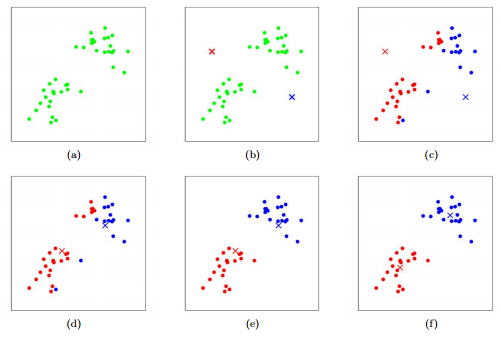

In [29]:
from sklearn import datasets

# Iris 데이터를 받아옵니다.
iris = datasets.load_iris()

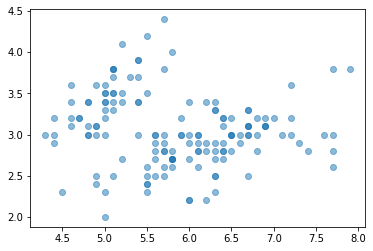

In [30]:
# iris.data를 samples 변수에 저장합니다.
samples = iris.data

# 시각화를 위한 x와 y를 생성하고, 데이터를 시각화해봅니다.
x = samples[:,0]
y = samples[:,1]
plt.scatter(x,y, alpha=0.5)
plt.show()

## 2.1 Implementing K-Means: Scikit-Learn

`sklearn.cluster` 모듈로 K-Means를 간편하게 구현할 수 있습니다.

[다큐멘테이션](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html)

## K-Means++

K-Means 클러스터링 알고리즘은 반세기가 넘었지만 유행에서 벗어나지 않고 있으며, 여전히 머신러닝의 가장 인기 있는 클러스터링 알고리즘입니다.

하지만, 그것의 첫 단계에는 몇 가지 문제가 있을 수 있습니다. 기존의 K-Means 알고리즘에서는 중심부의 시작 위치가 완전히 랜덤하게 초기화됩니다. 이로 인해 최적의 클러스터가 부족해질 수 있습니다.

이 예제에서는 K-Means++ 알고리즘으로 알려진 다른 버전의 K-Means에 대해 살펴보겠습니다. K-Means++는 이 문제를 해결하기 위해 센터가 초기화되는 방식을 변경합니다.

K-Means 알고리즘의 1단계는 "초기 군집에 대한 랜덤 중심 배치"입니다. K-Means++ 알고리즘은 K-Means 알고리즘의 1단계를 아래와 같이 대체합니다.

*   1.1 첫 번째 군집 중심은 데이터에서 랜덤하게 선택됩니다.
*   1.2 나머지 각 데이터 포인트에 대해 데이터 포인트들로부터 가장 가까운 군집 중심까지의 거리가 계산됩니다.
*   1.3 다음 군집 중심은 가장 가까운 군집 중심까지의 각 점의 거리에 비례하는 확률에 따라 선택됩니다. 따라서 다음 군집 중심은 이미 초기화된 중심에서 멀리 떨어져 있을 수 있습니다.

k 개의 센터 포인트들이 선택될 때까지 1.2 - 1.3을 반복합니다.

‘k-means++’ : selects initial cluster centers for k-mean clustering in a smart way to speed up convergence.

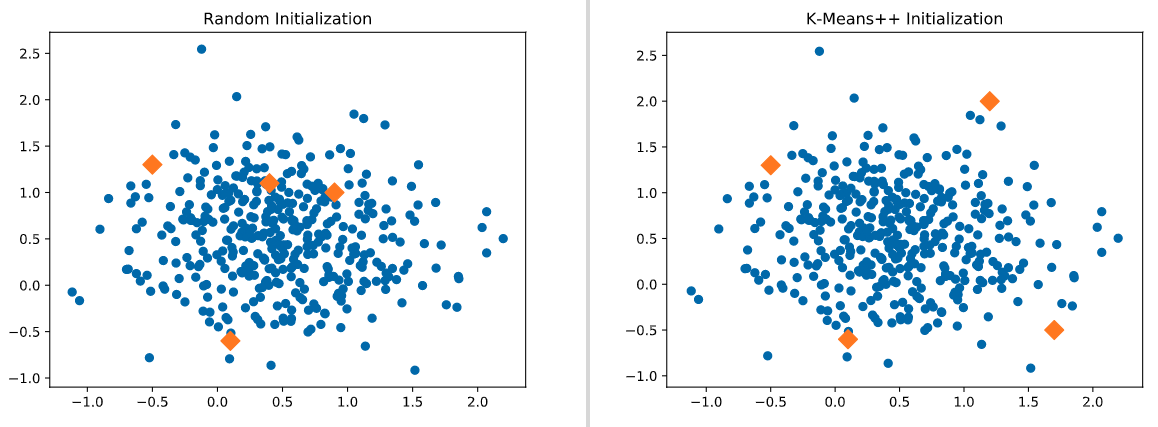

In [31]:
from sklearn.cluster import KMeans

# KMeans 모델을 생성하고(n_clusters=3) iris data에 훈련시킵니다.
model = KMeans(n_clusters = 3, init='random')
model.fit(samples)

KMeans(init='random', n_clusters=3)

In [32]:
# samples 데이터에 레이블을 부여하고, labels를 출력해봅니다.
labels = model.predict(samples)
print(labels)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 1 1 1 1 2 1 1 1 1
 1 1 2 2 1 1 1 1 2 1 2 1 2 1 1 2 2 1 1 1 1 1 2 1 1 1 1 2 1 1 1 2 1 1 1 2 1
 1 2]


K-평균을 사용하여 표본 데이터의 세 군집을 찾았습니다.

K-평균 군집을 계산한 모형을 생성했으므로 이제 새 데이터 샘플을 이 모델에 주고 `predict()` 함수를 사용하여 군집 레이블을 부여할 수 있습니다.

In [33]:
new_samples = np.array([[5.7, 4.4, 1.5, 0.4],
   [6.5, 3. , 5.5, 0.4],
   [5.8, 2.7, 5.1, 1.9]])

# 위에 주어진 샘플들에 대하여 레이블을 부여하고 출력해봅니다.
new_labels = model.predict(new_samples)
print(new_labels) 

[0 2 2]


저것들이 우리의 새 꽃 세 송이의 예상 라벨입니다. 만약 여러분이 다른 라벨을 보고 있다면, 걱정하지 마세요! 클러스터 중심은 랜덤하게 초기화되므로 모델을 반복적으로 실행하면 입력 데이터가 동일한 여러 클러스터를 생성할 수 있습니다.

## 3.2 Visualize After K-Means


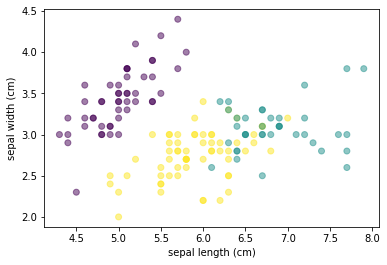

In [34]:
# 만들어진 클러스터를 시각화해봅니다.
x = samples[:,0]
y = samples[:,1]

plt.scatter(x, y, c=labels, alpha=0.5)

plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')

plt.show()

## 3.3 Evaluation

Iris 데이터를 3개의 그룹으로 클러스터링 해보았습니다. 생성된 군집들이 실제 데이터와 일치하는지 알아봅니다.

먼저 Iris 데이터 집합에는 다음과 같은 label이 존재합니다.

In [35]:
# target 데이터를 받아옵니다.
target = iris.target

Iris 데이터의 metadata에 따르면:

*   0: Iris-setosa
*   1: Iris-versicolor
*   2: Iris-virginica

다음 코드를 사용하여 이러한 값을 해당 종으로 변경합니다.

In [36]:
species = np.chararray(target.shape, itemsize=150)
 
for i in range(len(samples)):
  if target[i] == 0:
    species[i] = 'setosa'
  elif target[i] == 1:
    species[i] = 'versicolor'
  elif target[i] == 2: 
    species[i] = 'virginica'

그리고 나서 우리는 Pandas Library을 이용하여 cross tabulation을 실행할 것입니다.

교차표에서는 전체 측량 반응을 분석할 때 쉽게 알 수 없는 데이터 내의 관계를 조사할 수 있습니다.

결과는 다음과 같습니다.

In [37]:
# 먼저 k-means가 부여한 레이블과 실제 target값으로 DataFrame을 만듭니다.
df = pd.DataFrame({'labels': labels, 'species': species})
df.head()

,labels,species
0,0,b'setosa'
1,0,b'setosa'
2,0,b'setosa'
3,0,b'setosa'
4,0,b'setosa'


In [38]:
# 위에서 만들어진 DataFrame의 두 열에 대해 cross-tabulation을 수행합니다.
ct = pd.crosstab(df['labels'], df['species'])
print(ct)

species  b'setosa'  b'versicolor'  b'virginica'
labels                                         
0               50              0             0
1                0              2            36
2                0             48            14


## 3.4 The Number of Clusters

이 때, 우리는 Iris 데이터을 3개의 군집으로 분류했습니다. 하지만 데이터 집합에 세 가지 종류의 Iris가 있는 것을 몰랐다고 가정하면 가장 적합한 클러스터의 개수는 무엇일까요?

군집화가 잘되면 군집이 촘촘해지므로 각 군집의 표본이 함께 묶입니다. 군집 산포의 분산 정도는 관성(inertias)에 의해 측정됩니다. 관성은 각 표본에서 군집 중심까지의 거리입니다 (가장 가까운 군집 중심까지의 제곱 거리 합). 관성이 낮을수록 모델의 성능은 좋아집니다.

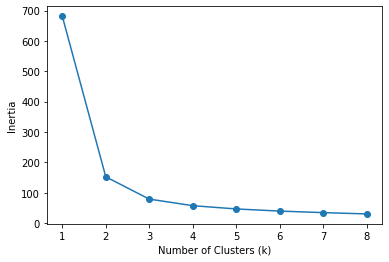

In [39]:
# 1부터 9까지의 각 클러스터 개수에 대해 k-means의 관성의 변화를 시각화합니다.
num_clusters = list(range(1, 9))
inertias = []
for k in num_clusters:
  model = KMeans(n_clusters=k)
  model.fit(samples)
  inertias.append(model.inertia_)
plt.plot(num_clusters, inertias, '-o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()

그래프가 계속 감소하는것을 확인할 수 있습니다. 목표는 관성이 낮고 군집 수가 가장 적은 것입니다.

이 그래프를 해석하는 방법 중 하나는 elbow를 찾는 것 입니다. 관성이 더 느리게 감소하기 시작할 때입니다. 따라서 위의 그래프에서 3은 군집의 최적 개수입니다.

# 3. Feature Selection

새로운 특성을 만드는 방법이 많으므로 데이터의 차원이 원본 특성의 수 이상으로 증가하기 쉽습니다. 그러나 특성이 추가되면 모델은 더 복잡해지고 과적합될 가능성도 높아집니다. 보통 새로운 특성을 추가할 때나 고차원 데이터셋을 사용할 때, 가장 유용한 특성만 선택하고 나머지는 무시해서 특성의 수를 줄이는 것이 좋습니다. 이렇게 하면 모델이 간단해지고 일반화 성능이 올라갑니다. 하지만 어떤 특성이 좋은지 어떻게 알 수 있을까요? 이를 위한 전략으로 일변량 통계 (univariate statistics), 모델 기반 선택 (model-based selection), 반복적 선택 (iterative selection)이 있습니다. 이 세방식을 모두 자세히 살펴보겠습니다. 이 방법들은 모두 지도 학습 방법이므로 최적값을 찾으려면 타깃값이 필요합니다. 그리고 데이터를 훈련 세트와 테스트 세트로 나눈 다음 훈련 데이터만 특성 선택에 사용해야 합니다.



## 3.1 일변량 통계

일변량 통계에서는 개개의 특성과 타깃 사이에 중요한 통계적 관계가 있는지를 계산합니다. 그런 다음 깊게 관련되어 있다고 판단되는 특성을 선택합니다. 분류에서는 분산분석(ANOVA)이라고도 합니다. 이 방식의 핵심 요소는 일변량, 즉 각 특성이 독립적으로 평가된다는 점입니다. 따라서 다른 특성과 깊게 연관된 특성은 선택되지 않을 것입니다. 일변량 분석은 계산이 매우 빠르고 평가를 위해 모델을 만들 필요가 없습니다. 한편으로 이 방식은 특성을 선택한 후 적용하려는 모델에 상관없이 사용할 수 있습니다.

scikit-learn에서 일변량 분석으로 특성을 선택하려면 분류에서는 `f-classif`을, 회귀에서는 `f_regression`을 보통 선택하여 테스트하고, 계산한 p-value에 기초하여 특성을 제외하는 방식을 선택합니다. 이런 방식들은 매우 높은 p-value를 가진 특성(즉, 타깃값과 연관성이 작은 특성)을 제외할 수 있도록 임계값을 조정하는 매개변수를 사용합니다. 임계값을 계산하는 방법은 각각 다르며, 가장 간단한 `SelectKBest`는 고정된 k개의 특성을 선택하고, `SelectPercentile`은 지정된 비율만큼 특성을 선택합니다. 그럼 cancer 데이터셋에 분류를 위한 특성 선택을 적용해보겠습니다. 문제를 조금 복잡하게 하기위해 의미 없는 노이즈 특성을 데이터에 추가하겠습니다. 특성 선택이 이 의미 없는 특성을 식별해서 제거하는지 보겠습니다.

In [40]:
from sklearn.datasets import load_breast_cancer
from sklearn.feature_selection import SelectPercentile, f_classif
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()

# 고정된 난수를 발생시킵니다.
rng = np.random.RandomState(42)
noise = rng.normal(size=(len(cancer.data), 50))
# 데이터에 노이즈 특성을 추가합니다. 처음 30개는 원본 특성이고 다음 50개는 노이즈입니다.
X_w_noise = np.hstack([cancer.data, noise])

In [41]:
# 원 데이터와 노이즈가 추가된 데이터의 크기를 비교해봅니다.
print(cancer.data.shape)
print(X_w_noise.shape)

(569, 30)
(569, 80)


In [42]:
# 데이터를 train/test셋으로 나눕니다. random_state=42, test_size=0.5
X_train, X_test, y_train, y_test = train_test_split(X_w_noise, cancer.target, random_state=42, test_size=0.5)

In [43]:
# f_classif(기본값)과 SelectPercentile을 사용하여 특성의 50%를 선택합니다.
select = SelectPercentile(score_func=f_classif, percentile=50)
select.fit(X_train, y_train)

# 훈련 세트에 적용합니다.
X_train_selected = select.transform(X_train)

In [44]:
print("X_train.shape", X_train.shape)
print("X_train_selected.shape", X_train_selected.shape)

X_train.shape (284, 80)
X_train_selected.shape (284, 40)


결과에서 볼 수 있듯이 특성 개수가 80개에서 40개로 줄었습니다. (원본 특성의 50%)

In [45]:
# `get_support` 메서드는 선택된 특성을 boolean 값으로 표시해줍니다. 어떤 특성이 선택되었는지 확인해봅니다.
mask = select.get_support()
print(mask)

[ True  True  True  True  True  True  True  True  True  True  True False
  True  True False  True  True  True False False  True  True  True  True
  True  True  True  True  True  True False False False  True False  True
 False False False False False False False  True False False False  True
 False False False False False False  True False False False  True False
 False False  True False False False  True  True  True False False False
  True  True False False False False  True  True]


([<matplotlib.axis.YTick at 0x7f5b5802c5d0>],
 <a list of 1 Text major ticklabel objects>)

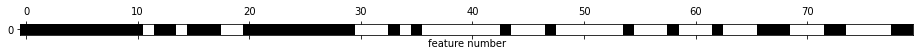

In [46]:
# 위 마스크를 시각화해봅니다.
plt.matshow(mask.reshape(1, -1), cmap='gray_r')
plt.xlabel("feature number")
plt.yticks([0])

마스킹된 그래프에서 볼 수 있듯이 선택된 특성은 대부분 원본 특성이고 노이즈 특성이 거의 모두 제거되었습니다. 그러나 원본 특성이 완벽하게 복원된 것은 아닙니다. 전체 특성을 이용했을 때와 선택된 특성만 사용했을 때 로지스틱 회귀의 성능을 비교해보겠습니다.

In [47]:
from sklearn.linear_model import LogisticRegression

# 테스트 데이터 변환
X_test_selected = select.transform(X_test)

# LogisticRegression모델을 생성하고 원본 데이터에 훈련시킨 성능과 중요한 특성들이 선택된 데이터에 훈련시킨 성능을 비교해봅니다.
lr = LogisticRegression(max_iter=10000)
lr.fit(X_train, y_train)
print("전체 특성을 사용한 정확도", lr.score(X_test, y_test))
lr.fit(X_train_selected, y_train)
print("선택된 일부 특성을 사용한 정확도", lr.score(X_test_selected, y_test))

전체 특성을 사용한 정확도 0.9614035087719298
선택된 일부 특성을 사용한 정확도 0.9649122807017544


이 경우에서는 일부 원본 특성이 없더라도 노이즈 특성을 제거한 쪽의 성능이 더 높습니다. 이 예는 인위적으로 간단하게 만든 예제이고 실제 데이터에서의 결과는 보통 엇갈리는 경우도 많습니다. 하지만 너무 많은 특성때문에 모델을 만들기가 현실적으로 어려울 때 일변량 분석으로 사용하여 특성을 선택하면 큰 도움이 될 수 있습니다. 또는 많은 특성들이 확실히 도움이 안 된다고 생각될 때 사용할 수 있습니다.

## 3.1.1 Selecting K best features

SelectPercentile 말고도 K 개의 중요한 특성을 선택하는 방법이 있습니다. `SelectKBest`를 이용하면 가능합니다. `SelectKBest`는 사용자가 지정한 k개의 중요한 특성을 반환해줍니다. 다만 위에서 사용한 데이터에는 음의 값이 있기 때문에 `SelectKBest`를 사용할 수 없습니다. 따라서 이 예제는 Iris 데이터를 사용합니다.

In [48]:
from sklearn.datasets import load_iris

iris_X, iris_y = load_iris(return_X_y=True)

In [49]:
iris_X.shape

(150, 4)

In [50]:
from sklearn.feature_selection import SelectKBest, chi2

# SelectKBest와 chi2 테스트를 사용하여 iris data에서 두개의 가장 중요한 특성을 선택합니다.
X_new = SelectKBest(chi2, k=2).fit_transform(iris_X, iris_y)
print(X_new.shape)

(150, 2)


## 3.2 모델 기반 특성 선택

모델 기반 특성 선택은 지도 학습 머신러닝 모델을 사용하여 특성의 중요도를 평가해서 가장 중요한 특성들만 선택합니다. 특성 선택에 사용되는 지도 학습 모델은 최종적으로 사용할 지도 학습 모델과 같을 필요는 없습니다. 특성 선택을 위한 모델은 각 특성의 중요도를 측정하여 순서를 매길 수 있어야 합니다. 결정 트리와 이를 기반으로 한 모델은 각 특성의 중요도가 담겨있는 `feature_importance_` 속성을 제공합니다. 일변량 분석과는 반대로 모델 기반 특성 선택은 한번에 모든 특성을 고려하므로 (사용된 모델이 상호작용을 잡아낼 수 있다면) 상호작용 부분을 반영할 수 있습니다. 모델 기반의 특성 선택은 `SelectFromModel`에 구현되어 있습니다.

In [51]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier

# RandomForestClassifier와 SelectFromModel을 이용하여 중요한 특성을 선택합니다.
select = SelectFromModel(RandomForestClassifier(n_estimators=100, random_state=42), threshold='median')

`SelectFromModel`은 지도 학습 모델로 계산된 중요도가 지정한 임계치보다 큰 모든 특성을 선택합니다. 일변량 분석으로 선택한 특성과 결과를 비교하기 위해 절반 가량의 특성이 선택될 수 있도록 중간값을 임계치로 사용하겠습니다. 트리 100개로 만든 랜덤포레스트 분류기를 사용해 특성 중요도를 계산합니다. 이는 매우 복잡한 모델이고 일변량 분석보다는 훨씬 강력한 방법입니다. 실제로 모델을 만들어봅니다.

In [52]:
# 모델을 데이터에 훈련시키고 선택된 특성의 shape을 출력합니다.
select.fit(X_train, y_train)
X_train_l1 = select.transform(X_train)
print("X_train.shape:", X_train.shape)
print("X_train_l1.shape:", X_train_l1.shape)

X_train.shape: (284, 80)
X_train_l1.shape: (284, 40)


Text(0.5, 0, 'featue number')

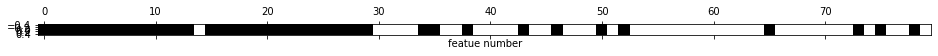

In [53]:
# 선택된 특성을 같은 방식으로 그려보겠습니다.
mask = select.get_support()
plt.matshow(mask.reshape(1, -1), cmap='gray_r')
plt.xlabel("featue number")

이번에는 두 개를 제외한 모든 원본 특성이 선택되었습니다. 특성을 40개 선택하도록 지정했으므로 일부 노이즈 특성도 선택되었습니다.

In [54]:
# LogisticRegression 모델로 성능이 얼마나 향상되었는지 확인해봅니다.
X_test_l1 = select.transform(X_test)
score = LogisticRegression(max_iter=10000).fit(X_train_l1, y_train).score(X_test_l1, y_test)
print("test score", score)

test score 0.9508771929824561


## 3.3 반복적 특성 선택

일변량 분석에서는 모델을 사용하지 않고, 모델 기반 선택에서는 하나의 모델을 사용해 특성을 선택했습니다. 반복적 특성 선택(iterative feature selection)에서는 특성의 수가 각기 다른 일련의 모델이 만들어집니다. 기본적으로 두가지 방법이 있습니다. 

*   특성을 하나도 선택하지 않은 상태로 시작해서 어떤 종료 조건에 도달할 때 까지 하나씩 추가하는 방법
*   모든 특성을 가지고 시작해서 어떤 종료 조건이 될 때까지 특성을 하나씩 제거해가는 방법

일련의 모델이 만들어지기 때문에 이 방법은 앞서 소개한 방법들보다 계산 비용이 월씬 많이 듭니다. 재귀적 특성 제거 (Recursive Feature Elimination, RFE)가 이런 방법의 하나입니다. 이 방법은 모든 특성으로 시작해서 모델을 만들고 특성 중요도가 가장 낮은 특성을 제거합니다. 그런 다음 제거한 특성을 빼고 나머지 특성 전체로 새로운 모델을 만듭니다. 이런 식으로 미리 정의한 특성 개수가 남을 때까지 계속합니다. 이를 위해 모델 기반 선택에서처럼 특성 선택에 사용할 모델은 특성의 중요도를 결정하는 방법을 제공해야 합니다. 다음은 앞에서와 같은 랜덤 포레스트 모델을 사용합니다.

In [55]:
from sklearn.feature_selection import RFE

# RFE를 생성하고 데이터에 훈련시킵니다.
select = RFE(RandomForestClassifier(n_estimators=100, random_state=42), n_features_to_select=40)
select.fit(X_train, y_train)

RFE(estimator=RandomForestClassifier(random_state=42), n_features_to_select=40)

Text(0.5, 0, 'feature number')

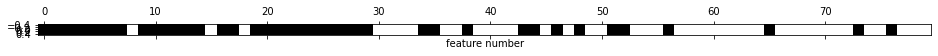

In [56]:
# 선택된 특성을 시각화합니다.
mask = select.get_support()
plt.matshow(mask.reshape(1, -1), cmap='gray_r')
plt.xlabel("feature number")

일변량 분석이나 모델 기반 선택보다 특성 선택이 나아졌지만, 여전히 특성 한개를 놓쳤습니다. 랜덤포레스트 모델은 특성이 누락될 때마다 다시 학습하므로 40번이나 실행됩니다. 그래서 이 코드를 실행하면 모델 기반 선택보다 훨씬 오래 걸립니다.

In [57]:
# RFE를 사용해서 특성을 선택했을 때 로지스틱 회귀의 정확도를 확인해보겠습니다.
X_train_rfe = select.transform(X_train)
X_test_rfe = select.transform(X_test)

score = LogisticRegression(max_iter=10000).fit(X_train_rfe, y_train).score(X_test_rfe, y_test)
print("test score", score)

test score 0.9578947368421052


In [58]:
# 또한 RFE에 사용된 모델을 이용해서도 예측을 할 수 있습니다. 이 경우 선택된 특성만 사용됩니다.
score = select.score(X_test, y_test)
print(score)

0.9508771929824561


RFE안에 있는 랜덤 포레스트의 성능이 이 모델에서 선택한 특성으로 만든 로지스틱 회귀의 성능과 비슷합니다. 다른 말로 하면, 특성 선택이 제대로 되면 선형 모델의 성능은 랜덤 포레스트와 견줄만 합니다.

머신 러닝 알고리즘에 어떤 입력값을 넣을지 확신이 안선다면 특성 자동 선택이 도움이 될 수 있습니다. 또한 예측속도를 높이거나 해석하기 더 쉬운 모델을 만드는 데 필요한 만큼 특성의 수를 줄이는 데도 효과적입니다.

# 과제

digits 데이터에 k-means clustering을 적용해보고, RandomForestClassifier의 분류 결과와 비교해봅니다. 일단, digit 데이터의 형태를 알아보도록 하겠습니다.

In [59]:
from sklearn import datasets

digits = datasets.load_digits()

<Figure size 432x288 with 0 Axes>

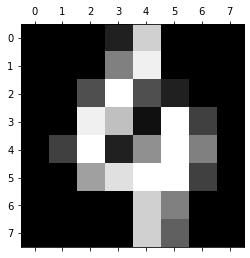

In [60]:
#digit데이터는 이미지 데이터로 아래와 같이 시각화 할 수 있습니다
plt.gray() 
plt.matshow(digits.images[100])
plt.show()

In [61]:
#위에 시각화한 이미지의 레이블을 출력해봅니다.
print(digits.target[100])

4


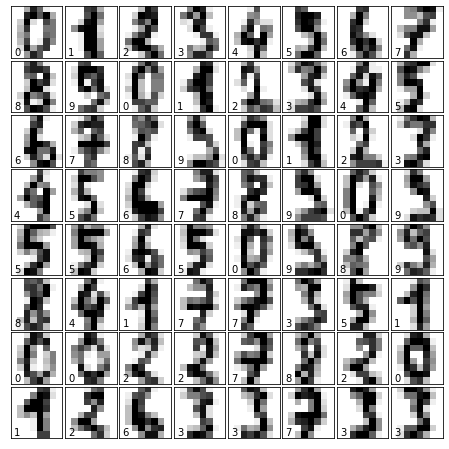

In [62]:
#64개의 digit 데이터를 시각화 해봤습니다.
#데이터의 형태에 대하여 이해를 하신후 밑에 본 과제를 시작하시면 되겠습니다
fig = plt.figure(figsize=(6, 6))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)
for i in range(64):
    ax = fig.add_subplot(8, 8, i+1, xticks=[], yticks=[])
    ax.imshow(digits.images[i], cmap=plt.cm.binary, interpolation='nearest')
    ax.text(0, 7, str(digits.target[i]))
plt.show()

## 과제 요구사항(총 15점)

1. digits.data와 digits.target을 train/test셋으로 나눕니다. random_state=42, test_size=0.3 (1점)

2.  KMeans 모델을 생성합니다. (모델 이름: kmeans, n_clusters=10, random_state=42, n_init=10). 생성한 모델을 훈련 데이터에 훈련시킵니다.(2점)

3. 테스트 데이터에 predict() 함수를 사용하여 레이블을 부여합니다. 새로 부여된 레이블의 변수 이름은 new_labels로 합니다.(1점)

4. 

    + new_labels의 첫번째 10개 아이템을 출력합니다.(0.5점)
    
    + 실제 label의 첫 10개의 아이템을 출력해봅니다.(0.5점)

5.  k-means를 통해 부여된 레이블과 같나요 다른가요? (1점)

6. 주어진 함수를 사용하여 클러스터 센터 이미지를 시각화해봅니다.(0.5점)

7. 위에 시각화된 클러스터 센터 이미지를 바탕으로 new_labels_cor에 올바른 숫자를 매핑시킵니다.(0.5점)

8.  실습에서 주어진 코드를 바탕으로 k-means가 부여한 레이블과 실제 레이블 값에 cross-tabulation을 실행합니다.(1점)

9. RandomForestClassifier모델을 생성하고 훈련 데이터에 훈련시킵니다. random_state=42(2점)

10. 랜덤포레스트의 predict() 함수를 사용하여 테스트 데이터에 대하여 레이블을 부여합니다.(1점)

11. 실제 레이블과 랜덤포레스트가 예측한 레이블을 사용하여 confusion matrix를 출력합니다.(1점)

  11-1.confusion matrix를 시각화 해봅니다(1점)

12. k-means 클러스터링으로 부여된 레이블과 랜덤 포레스트를 이용하여 예측된 레이블을 비교하고 분석합니다.(2점)

In [63]:
# 과제 1: digits.data와 digits.target을 train/test셋으로 나눕니다. random_state=42, test_size=0.3
X = digits.data
y = digits.target
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42,test_size=0.3)

In [64]:
# 과제 2: KMeans 모델을 생성합니다. (모델 이름: kmeans, n_clusters=10, random_state=42, n_init=10). 생성한 모델을 훈련 데이터에 훈련시킵니다.
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 10, random_state=42, n_init=10)
kmeans.fit(X_train)

KMeans(n_clusters=10, random_state=42)

In [65]:
# 과제 3: 테스트 데이터에 predict() 함수를 사용하여 레이블을 부여합니다. 새로 부여된 레이블의 변수 이름은 new_labels로 합니다.
new_labels = kmeans.predict(X_test)

In [66]:
# 과제 4-1: new_labels의 첫번째 10개 아이템을 출력합니다.
new_labels[:10]

array([0, 1, 1, 3, 4, 4, 8, 1, 8, 4], dtype=int32)

In [67]:
# 과제 4-2: 실제 label의 첫 10개의 아이템을 출력해봅니다.
y_test[:10]

array([6, 9, 3, 7, 2, 1, 5, 2, 5, 2])

In [68]:
#과제5:  k-means를 통해 부여된 레이블과 같나요 다른가요?
#정답: 다르다.

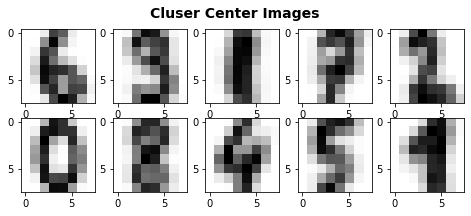

In [69]:
# 과제 6: 아래 함수를 사용하여 클러스터 센터 이미지를 시각화해봅니다.
fig = plt.figure(figsize=(8, 3))
fig.suptitle('Cluser Center Images', fontsize=14, fontweight='bold')

for i in range(10):
  # Initialize subplots in a grid of 2X5, at i+1th position
  ax = fig.add_subplot(2, 5, 1 + i)
  # Display images
  ax.imshow(kmeans.cluster_centers_[i].reshape((8, 8)), cmap=plt.cm.binary)

plt.show()

In [70]:
# 과제 7: 위에 시각화된 클러스터 센터 이미지를 바탕으로 new_labels_cor에 올바른 숫자를 매핑시킵니다.
new_labels_cor = np.empty(y_test.shape)

for i in range(len(new_labels)):
  if new_labels[i] == 0:
    new_labels_cor[i] = 2
  elif new_labels[i] == 1:
    new_labels_cor[i] = 0
  elif new_labels[i] == 2:
    new_labels_cor[i] = 8
  elif new_labels[i] == 3:
    new_labels_cor[i] = 3
  elif new_labels[i] == 4:
    new_labels_cor[i] = 4
  elif new_labels[i] == 5:
    new_labels_cor[i] = 7
  elif new_labels[i] == 6:
    new_labels_cor[i] = 5
  elif new_labels[i] == 7:
    new_labels_cor[i] = 9
  elif new_labels[i] == 8:
    new_labels_cor[i] = 6
  elif new_labels[i] == 9:
    new_labels_cor[i] = 1

In [71]:
# 과제 8: 실습에서 주어진 코드를 바탕으로 k-means가 부여한 레이블과 실제 레이블 값에 cross-tabulation을 실행합니다. 
df = pd.DataFrame({'new_labels_cor': new_labels_cor, 'y_test': y_test})
ct = pd.crosstab(df['new_labels_cor'], df['y_test'])
print(ct)

y_test           0   1   2   3   4   5   6   7   8   9
new_labels_cor                                        
0.0              0   0   2  47   0  16   0   0   3  48
1.0              0  13   0   0   2   0   0   0   0   5
2.0              0   0   0   0   0   1  52   0   0   0
3.0              0   0   0   2   2   0   0  53   0   4
4.0              0  10  41   1   0   0   0   0   0   0
5.0              0   0   4   4   0   0   0   1  36   1
6.0              0   0   0   0   0  48   0   0   1   1
7.0             52   0   0   0   0   0   1   0   0   0
8.0              0  27   0   0   2   0   0   1   3   0
9.0              1   0   0   0  54   1   0   0   0   0


In [72]:
# 과제 9: RandomForestClassifier모델을 생성하고 훈련 데이터에 훈련시킵니다. random_state=42
from sklearn.ensemble import RandomForestClassifier
forest_m = RandomForestClassifier(random_state=42)
forest_m.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [73]:
# 과제 10: 랜덤포레스트의 predict() 함수를 사용하여 테스트 데이터에 대하여 레이블을 부여합니다.
y_pred=forest_m.predict(X_test)

In [74]:
# 과제 11: 실제 레이블과 랜덤포레스트가 예측한 레이블을 사용하여 confusion matrix를 출력합니다.
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[52,  0,  0,  0,  1,  0,  0,  0,  0,  0],
       [ 0, 50,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 47,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 52,  0,  0,  0,  0,  2,  0],
       [ 0,  0,  0,  0, 60,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  1, 63,  1,  0,  0,  1],
       [ 0,  0,  0,  0,  0,  1, 52,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 54,  0,  1],
       [ 0,  2,  0,  0,  0,  0,  0,  0, 41,  0],
       [ 0,  0,  0,  1,  0,  1,  0,  1,  0, 56]])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


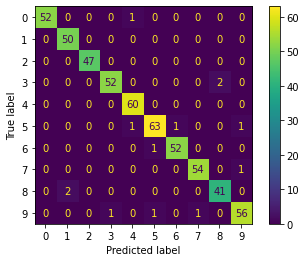

In [75]:
#과제11-1: confusion matrix를 시각화 해봅니다
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(forest_m, X_test, y_test)

In [76]:
# 과제 12: k-means 클러스터링으로 부여된 레이블과 랜덤 포레스트를 이용하여 예측된 레이블을 비교하고 분석합니다.
# 답변: k-menas clustering보다 랜덤 포레스트를 이용했을 때 예측의 정확도가 더 높다. 
#       confustion matrix와 cross tabulation의 대각선이 실제값과 모델이 예측값이 일치하는 곳인데, 
#       k-menas clustering은 대각선 외에 값들이 높은 값으로 존재하여 잘못 예측한 개수가 많은데, 그에 비해 랜덤 포레스트는 대부분 대각선에 값이 존재하고 예측이 틀린 대각선 외에 있는 데이터 수가 적다.